# FYS-STK4155 – Project 1: Regression analysis and resampling methods

##### Authors: Adele Zaini, Gaute Arnesson Holen, Fridtjof Gjengset
##### Date: 11. October, 2021

## Before we start: 

After a general introduction and some theoretical background with elements shared and useful for each exercise, we move more deeply into the explanation and presentation of each task.

### General introduction

In this first project we were asked to explore the techniques of Regression, as the basic step to go further deeply into Machine Learning, and the resampling methods, such as Bootstrap and Cross-validation, while perfoming a Bias-variance decomposition analysis.

In order to set up all our regression and resampling methods, we started working with a vanilla dataset given by the Franke function, depending of two independent variables $x$ and $y$, with an added stochastic noise. At the end, we performed the code with a real dataset taken from a terrain survey.

**Franke's function** is a weighted sum of four exponentials:

$$
\begin{align*}
f(x,y) &= \frac{3}{4}\exp{\left(-\frac{(9x-2)^2}{4} - \frac{(9y-2)^2}{4}\right)}+\frac{3}{4}\exp{\left(-\frac{(9x+1)^2}{49}- \frac{(9y+1)}{10}\right)} \\
&+\frac{1}{2}\exp{\left(-\frac{(9x-7)^2}{4} - \frac{(9y-3)^2}{4}\right)} -\frac{1}{5}\exp{\left(-(9x-4)^2 - (9y-7)^2\right) }.
\end{align*}
$$

The function is defined for $x,y\in [0,1]$.

<right><img src="img/FrankeFunction.png" width="650"></right>

As concerning the noise, we generate datasets with different amounts of noise by changing the $\sigma$ value of its normal distribution $\epsilon \sim \cal{N}(0,\sigma^2)$. By comparing the plot of the Franke function with and without noise and looking at further results, $\sigma=[0.1,0.2]$ gives a reasonable amount of noise.

### Theoretical background

*Note: the explanation is given assuming a two-dimensional problem, in order to emphathise the physical idea and not to overwhelm the explanation of indexes little useful for the understanding. Just consider inputs $x$ as both indipendent variables $(x,y)$ and the outputs $y$ as the third dimension $z$. Relevant differences will be pointed out through notes.*

Given the two datasets of inputs $x=[x_0,x_1,...x_{n-1}]$ and the outputs $y=[y_0,y_1,...y_{n-1}]$, we perform a polynomial fit of this function using Regression methods with the following **basic assumption**. There exists a continuous function (some degree-order polynomial) $f(x)$ s.t. we can interpret the outputs as **$y(x)=f(x)+\epsilon$**. Basically we are splitting the outputs into a deterministic component, our model, and a stochastic error contribution $\epsilon$. Also, an importnant assumption is given by this error $\epsilon$ that we assume normally distributed with $\mu=0$ and variance $\sigma^2$ ($\epsilon \sim \cal{N}(0,\sigma^2)$).

So now assuming that the $f(x)$ can be approximated as a polynomial of $k$ degree, we get the following expression:

$$
y=y(x) \ \ \rightarrow \\ y(x_i)=\tilde{y}_i+\epsilon_i=\sum_{j=0}^{k-1} \beta_j x_i^j+\epsilon_i, \\ \forall i=0,...n
$$

So that our model $\boldsymbol{\tilde{y}}$ (i.e. without the stochastic component) can be rewritten in a matricial notation:

$$
\boldsymbol{\tilde{y}}= \boldsymbol{X}\boldsymbol{\beta},
$$
where $X$ is called *Design matrix* with $n$ rows and the number of columns depending on the degree of the polynomial. While $\beta$ is the estimator vector of the coefficients of our regression. 

*Note: in the three-dimensional problem, each row of the design matrix would look like $X_{i*}=[x_i, y_i,
x_i^2, y_i^2, x_iy_i, \dots]$. If the polynomial is of degree $k$ than our model will have $k'=\frac{(k+1)(k+2)}{2}$ ($k>0$) feutures, that means $k'$ columns of the design matrix and elements in $\beta$. The design matrix is then $(n \ \text{x} \ k')$.*

We need to find the optimal $\hat{\beta}$ that is the one that minimizes the cost function $C(X,\beta)$ (i.e. the "difference" between our data and the model we are choosing). In our own case, the $MSE$ is taken as cost function:
$$
C(X,\beta)=MSE(X,\beta)=\\ =\frac{1}{n}\sum_{i=0}^{n-1}\left(y_i-\tilde{y}_i\right)^2=\\ =\frac{1}{n}\sum_{i=0}^{n-1}\left(y_i-X_{i*}\beta\right)^2
$$


The expression of the optimal $\hat{\beta}$ depends on the regression methods choosen. Here we explore the Linear (Ordinary Least Square, OLS), Ridge and Lasso Regression. For further details, see the introduction of the respective exercise.


### Code structure

The code is structured into libraries (e.g. `regression.py`), which gather all the functions needed for solving the various tasks, while the specific task codes are in `task*.py` files.

In the course of this notebook, we inserted runnable cells to run the task codes directly and dynamically from here to show up the results, e.g.:

```
%run ./1project/task1.py
```


After a brief introduction, we will explain the algorithm, show the results and comment on them.

*Note: a further improvement to the code would be structuring as **object-oriented**. We have started converting the code but by the time of the deadline it was not ready to be runnable yet.*

## Exercise 1: Ordinary Least Square (OLS) on the Franke function

### Introduction
In this task we are asked to write our own code to perfom a standard least square regression analysis using polynomials in $x$ and $y$ up to fifth order. 

### <font color=purple>Ordinary Least Square Equation</font>
For the OLS Regression, the formula for the optimal $\hat{\beta}$ is the following (*Ordinary Least Square Equation*):

$$\hat{\beta}_{OLS} = (X^T X)^{-1}X^T z$$

and the predicted outputs are given by the previous formula $\tilde{z}= X\hat{\beta}_{OLS}$.

### <font color=purple>Error analysis</font>
To access the quality of the model, we perfom an error analysis, involving the Mean Square Error ($MSE$) and the $R^2$ score function:

$$
MSE(\hat{z},\hat{\tilde{z}}) = \frac{1}{n}
\sum_{i=0}^{n-1}(z_i-\tilde{z}_i)^2,
$$

$$
R^2(\hat{z}, \tilde{\hat{z}}) = 1 - \frac{\sum_{i=0}^{n - 1} (z_i - \tilde{z}_i)^2}{\sum_{i=0}^{n - 1} (z_i - \bar{z})^2},
$$

where $\tilde{z}_i$ is the predicted value of the $i-th$ sample, $z_i$ is the corresponding true value and $\bar{z}$ is the mean value given by $ \bar{z} =  \frac{1}{n} \sum_{i=0}^{n - 1} z_i$.

### <font color=purple>Confidence interval</font>

The Confidence Interval gives a range of possible values for an unknown parameter, in own task that is the estimators $\beta$. This confidence interval is then associated with a cumulative probability, which indicates the probability that the random event described by the aleatory variable falls within this confidence interval. Graphically speaking, this is equal to the area subtended by the probability distribution curve of the aleatory variable in the interval considered. A confidence level of $95\%$ is commonly used and it is normally referred to as a *two-$\sigma$* confidence level.

<right><img src="img/ConfidenceInterval.png" width="500"></right>

Assuming that our estimators $\beta_i$ follow a normal distribution, we evaluate the confidence interval thanks to the following formula:

$$
CI=\left(\mu_{\beta_j}\pm \frac{z\sigma_{\beta_j}}{\sqrt{n}}\right),
$$

where $\mu_{\beta_j}$ is the unbiased value of $\beta_j$, $n$ is the number of datapoints, $z$ defines the level of certainty (taken a $z=1.96$ it corresponds to a confidence of $95\%$), while $\boldsymbol{\sigma_{\beta_j}}^2=var(\boldsymbol{\beta_j})$ is the variance of $\beta_j$ evaluated throught the espression:

$$\boldsymbol{\sigma_{\beta_j}}^2 = \boldsymbol{\sigma}^2 [(\mathbf{X}^{T} \mathbf{X})^{-1}]_{jj} $$

where $\sigma$ is the standard deviation of the dataset distribution, which in our case corresponds to the standard deviation of the stochastic error ($z_i \sim \mathcal{N}( \mathbf{X}_{i, \ast} \, \boldsymbol{\beta}, \sigma^2)$, further details on the statics in the [lecture notes](https://compphysics.github.io/MachineLearning/doc/pub/week36/html/week36.html)).

*Note: each of the $\beta$-values has its own confidence interval.*



### Algorithm

First of all, we create our vanilla dataset using the FrankeFunction espression, $n=25$ datapoints for $x$ and $y$ (given 625 $z$ datapoints) and an error distributed as $\epsilon \sim \cal{N}(0,0.1)$. Then we create the design matrix $X$ for a polynomial of degree 5 and we split the data into a 80% training and 20% test datasets. This datasets are then rescaled subtracting the mean value and we perfom a Ordinary Least Square regression to have the model outputs ($z$ values from the training data) and the prediction ones ($z$ values from the test data). The matrix pseudoinverse provided by *numpy* is used to evaluate the inverse in the OLS equation, even when this is singular. The error analysis is then applied to both the training and test outputs and the confidence interval of the $\beta$ estimetors is evaluated.

<font color=purple>**rescaling: You should present a critical discussion of why and how you have scaled or not scaled the data**</font>

The library called `regression.py` contains all the functions needed for this exercise, while the main code is in `task1.py`. The functions used to solve this exercise are:

- `FrankeFunction(x,y)`: evaluate the Franke function from the values $x$ and $y$.
- `create_xyz_dataset(n,mu, sigma)`: create the inputs $(x,y)$ and output $z$ datasets with $n^2$ datapoints and use the `FrankeFunction(x,y)` adding a stochastic normally distrbuted noise $\epsilon \sim \cal{N}(\mu,\sigma)$.
- `Plot_frankefunction(x,y,z)`: create a 3d plot suitable for displaying the Franke function.
- `create_X(x,y,n)`: create the design matrix from the the two indipendent variables $x$ and $y$ with a complexity (i.e. degree of polynomial, feutures) $n$.
- `Split_and_Scale(X,z,test_size=0.2, scale=True)`: split the dataset, using *train_test_split* from Scikit-Learn, into a training and test datasets in a fraction given by a *test_size* (default value *0.2*). Scaling the data is optional, according the problem. The default boolean argument is *scale=True* and it uses the *StandardScaler(with_std=False)* from Scikit-Learn to subtract the mean value from the dataset. 
- `OLS_solver(X_train, X_test, z_train, z_test)`: evaluate the OLS equation through matix inversion and return the optimal $\hat{\beta}$ values, our model *z_tilde* ($z$ values from the training data) and our prediction *z_pred* ($z$ values from the test data). 
- `MSE(z_data, z_model)`: calculate the mean square error of a dataset compared to a model or prediction.
- `R2(z_data,z_model)`: calculate the R2 score of a dataset compared to a model or prediction.
- `Confidence_Interval(beta, X, sigma=1)`: evaluate the confidence interval of $\beta$ values through the their variance and the standard deviation of the model (default value is *1*) with a 95% certainty.

### Results

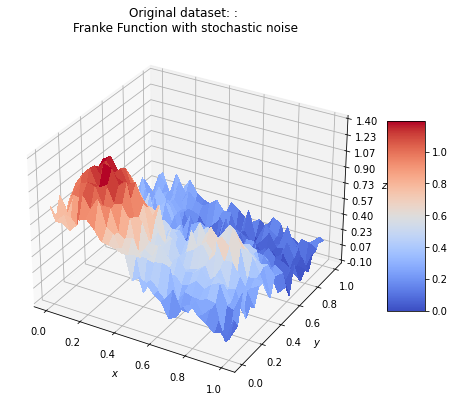

––––––––––––––––––––––––––––––––––––––––––––
Train MSE: 0.0109
Test MSE: 0.0147
––––––––––––––––––––––––––––––––––––––––––––
Train R2: 0.8776
Test R2: 0.845
––––––––––––––––––––––––––––––––––––––––––––
Confidence interval of β-estimator at 95 %:


,$β_{-}$,$β_{ols}$,$β_{+}$
0,0.000,0.000,0.000
1,8.896,8.899,8.902
2,4.102,4.104,4.107
3,-38.883,-38.868,-38.854
4,-19.087,-19.076,-19.064
5,-9.780,-9.767,-9.753
6,56.411,56.442,56.473
7,53.371,53.395,53.419
8,27.579,27.602,27.625
9,-5.459,-5.428,-5.397


––––––––––––––––––––––––––––––––––––––––––––


In [3]:
%run ../1project/task1.py

### Comments

The $MSE$ is very close to 0 and $R^2$ tends to 1 for both training and testing datasets. This shows a very good behaviour of our model, as a fit of a fifth order polynomial.

The confidence interval of $\beta$ shows that for each estimator the range is very small, meaning that the variance is not high and the model is performing well, not going into overfitting.

## Exercise 2: Bias-variance trade-off and resampling techniques

### Introduction

This exercise focuses on studying the bias-variance trade-off by implementing the *bootstrap* resampling technique.

### <font color=purple>MSE VS complexity</font>

First of all we are asked to analyse the MSE both for training and testing data as a function of complexity (i.e. degree of fitting polynomial), in order to identify the best complexity. The question is: *which is the best complexity then?*

Let's consider the following picture, taken from [Hastie et al.](https://github.com/CompPhysics/MLErasmus/blob/master/doc/Textbooks/elementsstat.pdf):

<right><img src="img/MSE_complexity.png" width="500"></right>

Considering the testing MSE, we expect that it tends to 0, because we are tuning our model on the training dataset and the "difference" between the real data and our model tends to 0 when complexity increases. Considering instead the test MSE, it show a U-behaviour, getting to an increase when reaching a certain value of complexity. This means we are overfitting. Testing the model on new fresh data allows us to check if the model is "over-complex" and tends to pass through every single datapoint without considering and buffering the stochastic noise, as it should be. Here is a picture showing case of **underfitting and overfitting**:

<right><img src="img/Under_Overfitting.png" width="700"></right>

This is exactly the reason why we need to split in training and testing datasets. 

It is also possible to appreciate the regions of low/high bias and variance, it will be clearer after the Bias-Variance tradeoff analysis explanation.

So *which is the best complexity then?* The best complexity corresponds to the **minimum of the test MSE curve**.

### <font color=purple>Bootstrap and resampling techniques</font>

Resampling techniques are used to have more robust outputs from the model analysis. This means that if we want to evaluate the MSE, doing it once may not be sufficient to investigate the real bahaviour of the model. The basic idea is **resampling and reshuffling the dataset, then performing the algorithm on this "new" dataset for $b$ times, having then a probability distribution of the estimator we want to investigate** (in our case this is the optimal $\hat{\beta}$). 

This is a way to "by-pass" the fact that we have a limited dataset to realize our model, while at the same time making everything less sensible to stochastic fluctuations in this realization.

**Bootstrap algorithm**:

Given a domain $D=[x_1,x_2, \dots, x_n]$,
1. Draw a bootstrap sample $[x_1^*,x_2^*, \dots, x_n^*]$ randomly selecting from domain;
2. Compute $\hat{\beta}^*=g(x_1^*,x_2^*, \dots, x_n^*)$ with the proper function $g(x_j)$ (in our case is the OLS equation);
3. Repeat the previous steps b-times, yielding the set of estimators {$\hat{\beta}^*_1,\hat{\beta}^*_2,\dots,\hat{\beta}^*_b$};
4. Now it is possible to draw the histogram and can apply all the statistics we need to investigate the statistical properties of out estimator $\hat{\beta}$. 

Here is an example of the bootstrap resampling tecnique as demonstration of the *central limit theorem* ($z\rightarrow\mu$ and $\sigma_z\rightarrow\sigma/\sqrt{b}$ as datapoints $N\rightarrow\infty$).

<right><img src="img/Bootstrap.png" width="500"></right>

### <font color=purple>Bias-Variance Tradeoff Analysis</font>

The bias–variance tradeoff is a way of analyzing a learning algorithm's expected error (e.g. $MSE$) as a sum of three terms: the bias, variance, and a quantity called the *irreducible error*, which is usually the variance $\sigma^2$ of the noise $\epsilon$ distribution.

$$
MSE=\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=bias^2+variance+\sigma^2.
$$

where:

$$
bias^2=\mathrm{Bias}^2(\boldsymbol{f},\boldsymbol{\tilde{y}})=\mathbb{E}\left[(\boldsymbol{f}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2\right]=\frac{1}{n}\sum_i(f_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2 \\
variance=\mathrm{Var}\left[\boldsymbol{\tilde{y}}\right]=\mathbb{E}\left[(\boldsymbol{\tilde{y}}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2\right]=\frac{1}{n}\sum_i(\tilde{y}_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2 \\
\sigma^2=\mathbb{E}\left[(\boldsymbol{\epsilon}-\mathbb{E}\left[\boldsymbol{\epsilon}\right])^2\right]=\mathbb{E}\left[\boldsymbol{\epsilon}^2\right]
$$


<font color=purple>**Prove the equation:**</font>

To derive this equation, we need to recall that the variance of $\boldsymbol{y}$ and $\boldsymbol{\epsilon}$ are both equal to $\sigma^2$ and the mean value of $\boldsymbol{\epsilon}$ is by equal to zero. Furthermore, the function $f$ and $\boldsymbol{\tilde{y}}$ are not stochastic variables.

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathbb{E}\left[(\boldsymbol{f}+\boldsymbol{\epsilon}-\boldsymbol{\tilde{y}})^2\right],
$$

and adding and subtracting $\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]$ we get

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathbb{E}\left[(\boldsymbol{f}+\boldsymbol{\epsilon}-\boldsymbol{\tilde{y}}+\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2\right],
$$

Reorganizing the espression we get
$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=
\mathbb{E}\left[(\boldsymbol{f} -\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2\right]+
\mathbb{E}\left[(-(\boldsymbol{\tilde{y}}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]))^2\right]+
\mathbb{E}\left[(\boldsymbol{\epsilon})^2\right],
$$

And so the three terms of the previous expression.

<font color=purple>**Meaning of the bias and variance terms:**</font>
- **Bias**: is the error we get when assuming a model. It is the "distance" between the real function $f$ and the model $\tilde{y}$ and highlights the erroneous assumptions in the learning algorithm. High bias can cause an algorithm to miss the relevant relations between features and target outputs (*underfitting*).
- **Variance**: shows how much the model outputs are spread. High variance may result from an algorithm modeling the stochastic noise in the training data (*overfitting*).

<center><img src="img/Bias_Variance.png" width="900"></center>

Our aim is then get a low bias and a low variance, that corresponds indeed with the minimum of the error (i.e. $MSE_{test}$). In the right graph, we can appreciate the dependance to complexity and the areas of the underfitting and overfitting with bias and variance decomposed. In this case the best complexity is in the range $[8,10]$.

### Algorithm

Firstly, the $MSE$ is explored as function of complexity in order to get figure. 2.11 from [Hastie et al.](https://github.com/CompPhysics/MLErasmus/blob/master/doc/Textbooks/elementsstat.pdf). This means running the previous code in an external loop over a range of degrees of the polynomial. This is done through the following function:

- `plot_ols_complexity(x, y, z, complexity = np.arange(1,21))`: compute the $MSE_{train}$ and $MSE_{test}$ of the OLS Regression as functions of complexity and plot the graph.

As concerning the second part, the Bias-Variance tradeoff analysis has been implemented with the *bootstrap* algorithm through the following functions:

- `bootstrap(X_train, X_test, z_train, z_test, n_boostraps=100, solver = "OLS", lmd = 10**(-12))`: run the bootstrap algorithm over *n_bootstrap* times and return a matrix where the columns correspond to the $z$ predictions from each bootstrap run (dimension: [*n X n_bootstrap*]). The *solver* and *lambda* value can be set according to the Regression technique chosen.
- `bias_variance_analysis(X_train, X_test, z_train, z_test, resampling="bootstrap", n_resampling = 100, solver = "OLS", lmd = 10**(-12))`: operate the bias-variance tradeoff analysis coupled with the given *resampling* method (default: bootstrap) with *n_resampling* runs and return the *error* (i.e. $MSE_{test}$), the *bias* and the *variance*. The other paramenters are set according to the regression technique chosen.
- `bias_variance_complexity(x, y, z, complexity = np.arange(1,15), n_resampling = 100, test_size = 0.2, plot=True, title), solver = "OLS", lmd = 10**(-12)`): compute the *error*, the *bias* and the *variance* as functions of complexity, plot the graph (optional) and retunr the vectors of the three variables versus complexity, for further analysis. Other paramenters (i.e. *n_resampling*, *test_size*) are given to tune the analysis and explore its behaviour.

After performing the bias-varaince tradeoff analysis in a range of complexity $(0,18)$, we run a loop for exploring different properties of this analysis, changing the number of datapoints ($n^2=[625,1600]$) and the portion of training and testing datapoints ($\text{test_size}=[0.2,0.33]$).

Seeing that the results are not smooth as expected, a rolling mean has been performed to buffer the fluctuation and to get the increasing or decreasing trend. A function has been written:

- `Rolling_Mean(vector, windows=3)`): use Pandas' dataframe to evaluate the rolling mean of the given vector over a given number of windows (default: 3), the "upper value" from the mean at $+\sigma$ and the "bottom value" from the mean at $-\sigma$.

This function is then called to plot nice smooth graphs.

### Results

Part 1: MSE_train and MSE_test in function of the complexity of the model (degree-order of polynomial) 



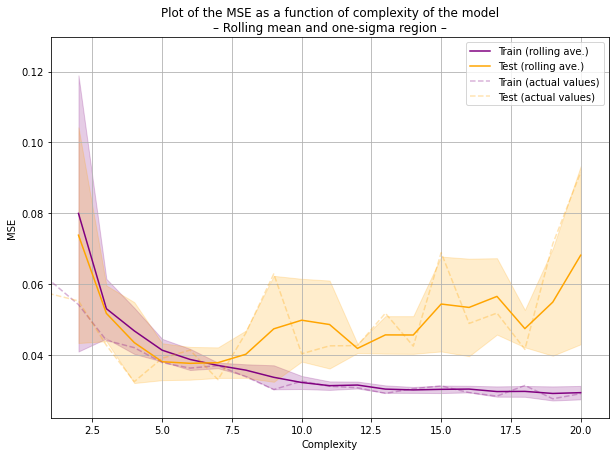

Part 2: perform a bias-variance tradeoff analysis 

Train datapoints: 500
Test datapoints: 125


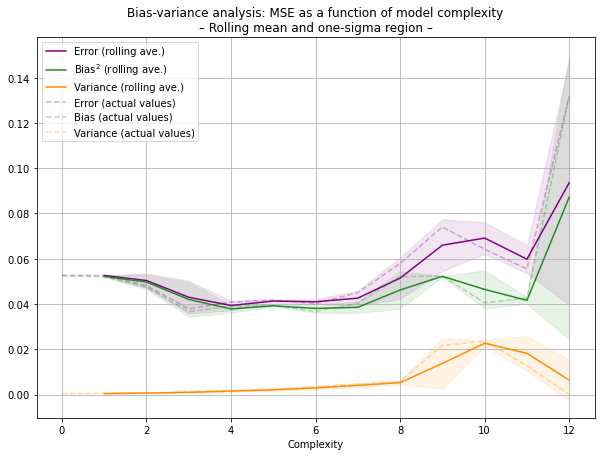

Bias-variance tradeoff analysis with variation in training and testing datapoints
0 ) Datapoints: 625 – Test size: 0.2
1 ) Datapoints: 625 – Test size: 0.33
2 ) Datapoints: 1600 – Test size: 0.2
3 ) Datapoints: 1600 – Test size: 0.33


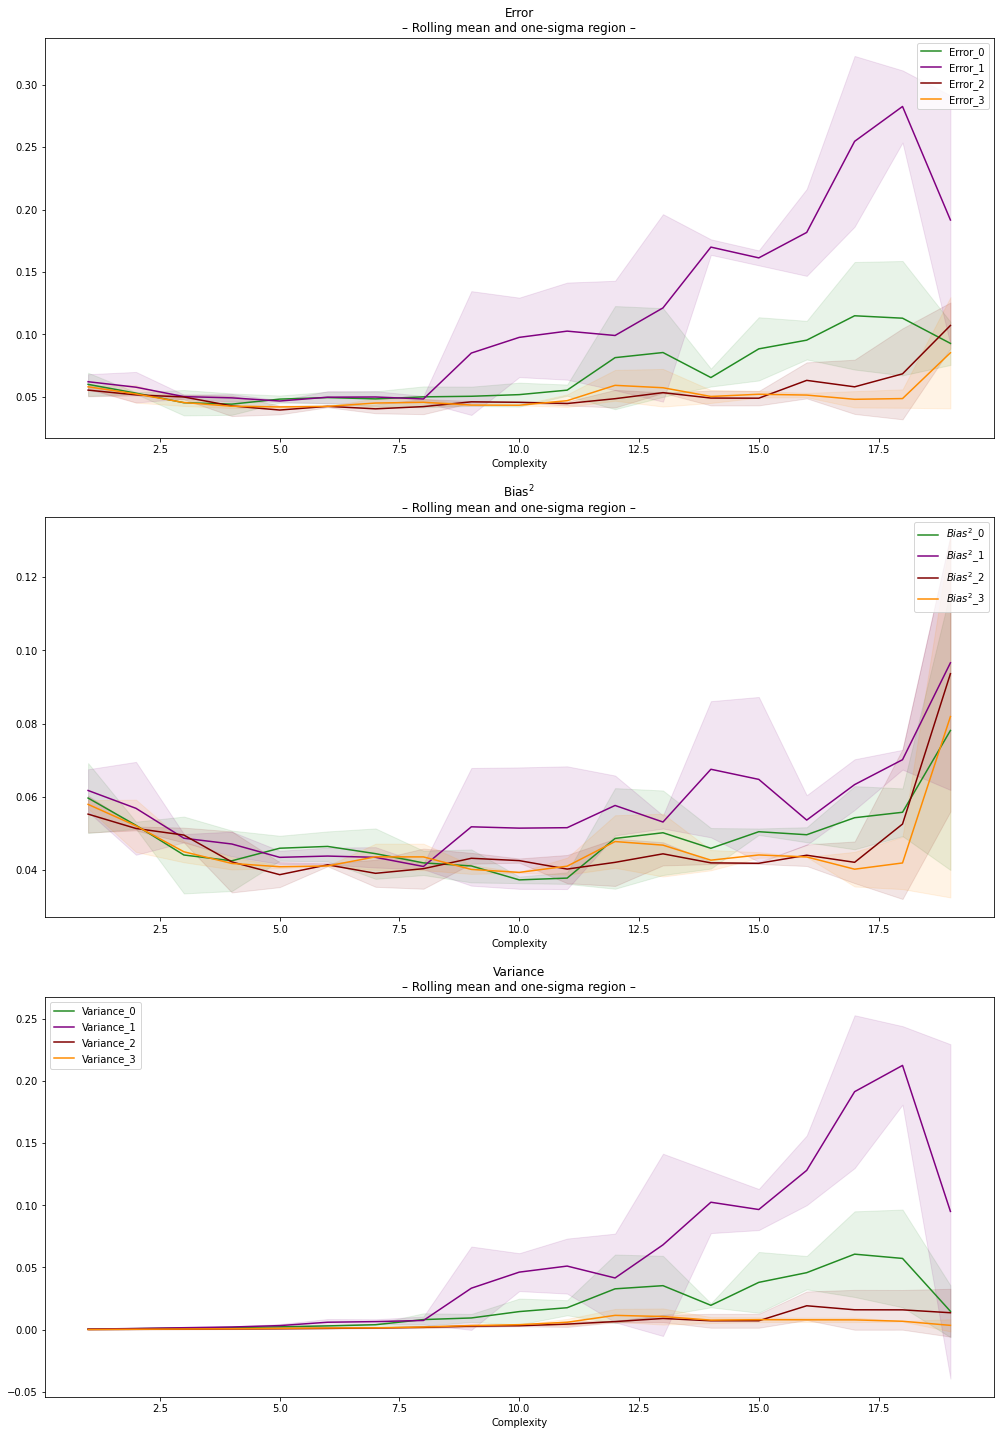

In [4]:
%run ../1project/task2.py

### Comments

<font color=purple>**MSE VS complexity**</font>

Initially the MSE for both test and train decreases as our model improves with the complexity of the polynomial. Around a polynomial of the 5th degree, we can see that the MSE for the test data increases, while the MSE for the train data continues to decrease. This is because the increased complexity causes overfitting. Our model therefore fits the training data better, but gives a poor model for the test data, because it has overfitted to the training set. It seems our model does best around a complexity of $n=5$.


<font color=purple>**Bias-variance tradeoff analysis**</font>

[...]

–––––––––––––––––––––––––––––––––––––

**Discuss the bias and variance trade-off as function
of your model complexity (the degree of the polynomial) and the number
of data points**, and possibly also your training and test data using the **bootstrap** resampling method.</font>

## Summing up




The bias-variance tradeoff summarizes the **fundamental tension** in
machine learning, particularly supervised learning, **between the
complexity of a model and the amount of training data** needed to train
it.  Since data is often limited, in practice it is often useful to
use a less-complex model with higher bias, that is  a model whose asymptotic
performance is worse than another model because it is easier to
train and less sensitive to sampling noise arising from having a
finite-sized training dataset (smaller variance). 



The above equations tell us that in
order to minimize the expected test error, **we need to select a
statistical learning method that simultaneously achieves low variance
and low bias**. Note that variance is inherently a nonnegative quantity,
and squared bias is also nonnegative. Hence, we see that the expected
test MSE can never lie below $Var(\epsilon)$, the irreducible error.


What do we mean by the variance and bias of a statistical learning
method? 
– The variance refers to the amount by which our model would change if we
estimated it using a different training data set. Since the training
data are used to fit the statistical learning method, different
training data sets  will result in a different estimate. But **ideally the
estimate for our model should not vary too much between training
sets. However, if a method has high variance  then small changes in
the training data can result in large change** in the model. In general, more
flexible statistical methods have higher variance.


## Exercise 3: Cross-validation as resampling techniques, adding more complexity

### Introduction


### Algorithm

- `cross_validation(k, designmatrix, datapoints, solver="OLS",random_groupsize = False, lmd=10**(-12))`: divide the dataset into k folds of n groups and peforms cross validation
- `group_indeces(n, random_groupsize = False, sections = 10)`: create index pairs, sectioning off a range of indexes into smaller groups.
- `combine_groups(index_pairs, data)`: combine the index pairs into one np.array.


### Results

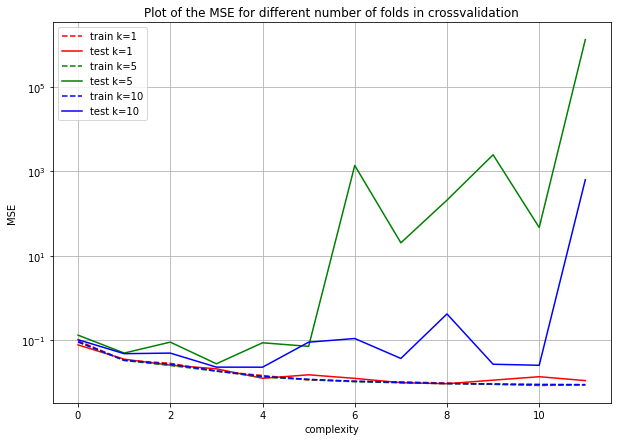

In [1]:
%run ../1project/task3.py

### Comments
<font color=purple>**comment results**</font>

## Exercise 4-5: Ridge and Lasso Regression on the Franke function with resampling

### Introduction

In task 4 and 5 we are asked to rerun all the previous results switching from the OLS Regression to the Ridge and Lasso Regression.

Since it is basically the same code we decide not to split into two different tasks, but to keep everything in one.

### <font color=purple>Ridge Regression</font>
For the Ridge Regression, the formula for the optimal $\hat{\beta}$ is the following:

$$
\hat{\beta}_{\mathrm{Ridge}} = \left(X^TX+\lambda I\right)^{-1}X^Tz,
$$

and the predicted outputs are given by the previous formula $\tilde{z}= X\hat{\beta}_{Ridge}$. Ridge regression is nothing but the standard OLS with a modified diagonal term added to $X^TX$.

### <font color=purple>Lasso Regression</font>

For the Lasso Regression, there is no nice formula as for $\hat{\beta}_{OLS}$ and $\hat{\beta}_{Ridge}$, because the cost function has an absolute value that raises problem when we derivate to find the optimal $\hat{\beta}_{Lasso}$:

$$
\boldsymbol{X}^T\boldsymbol{X}\boldsymbol{\hat{\beta}_{Lasso}}+\lambda \mathrm{sgn}(\boldsymbol{\hat{\beta}}_{Lasso})=2\boldsymbol{X}^T\boldsymbol{y}.
$$

where $$
\mathrm{sgn}(\boldsymbol{\beta})=\frac{d \vert \beta\vert}{d \boldsymbol{\beta}}=\left\{\begin{array}{cc} 1 & \beta > 0 \\ 0 & \beta =0\\-1 & \beta < 0, \end{array}\right.
$$

and the predicted outputs are given by the previous formula $\tilde{z}= X\hat{\beta}_{Lasso}$.


### Algorithm

First of all, we explore the behaviour of these regressions investigating the **bias-variance tradeoff analysis with the bootstrap resampling and the MSE as function of complexity with cross-validation algorithm**. This is done by plotting taking into count different $\lambda$s, while using the following functions:

- `ridge_reg(X_train, X_test, z_train, z_test, lmd=10**(-12))`: evaluate the Ridge equation through matix inversion for the given $\lambda$ value and return the optimal $\hat{\beta}$ values, our model *z_tilde* ($z$ values from the training data) and our prediction *z_pred* ($z$ values from the test data). 
- `lasso_reg(X_train, X_test, z_train, z_test, lmd=10**(-12))`: evaluate the Lasso equation through Scikit-Learn methods for the given $\lambda$ value  and return our model *z_tilde* ($z$ values from the training data) and our prediction *z_pred* ($z$ values from the test data). 

These are the equivalent of `OLS_solver()` method and we chose $\lambda=10^{-12}$ as default value because as $\lambda$ gets smaller, the more we can appreciate the Ridge and Lasso Regression properties. 

- `run_plot_compare(datapoints, n_resampling, N = 50, plot=False, lmd=10**(-12), k = 5, poly_degree = 10, plot_runtime=True, saveplots=False, foldername)`: compare and plot the performance of the three solvers (OLS, Ridge, Lasso) for fixed paramaters (i.e. *lambda*, *n_resampling*, *k*-folds) for both the bias-variance analysis and the cross-validation resampling. It also plot an (interesting) comparison of the different runtimes for each solver.


- `compare_lmd_BS(datapoints, N, lambdas, poly_degree, solver = 'RIDGE', n_resampling = 100, saveplots = False, foldername)`: perform and plot the bias-variance tradeoff analysis as functions of complexity, comparing the results for different *lambdas*.
- `compare_lmd_CV(datapoints, N, k, lambdas, poly_degree, solver = 'RIDGE', saveplots = False, foldername')`: perform and plot the test MSE as functions of complexity with the cross-validation resampling implemented, comparing the results for different *lambdas*.

As last step we then explore the behaviour of the **MSE of Ridge and Lasso Regressions as function of different $\lambda$s**. This is made just adding an external loop to the evaluation of the MSE for both training and testing data, varying the values of $\lambda$ each time.

*Advise for further deepenings: it is possible to couple this code with the `Rolling Mean` algorithm explained in the previous section, which has been added later on to buffer the fluctuations in the graphs and appreciate more the increasing/decreasing trend.*

### Results

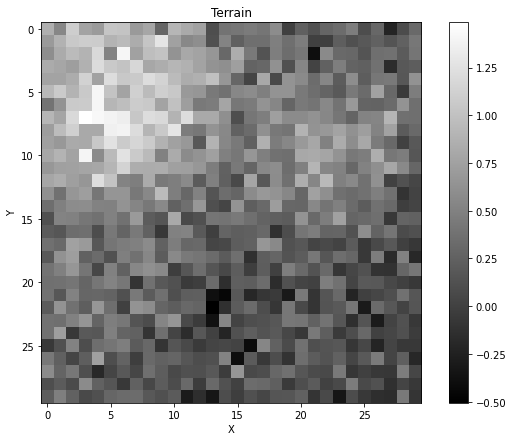

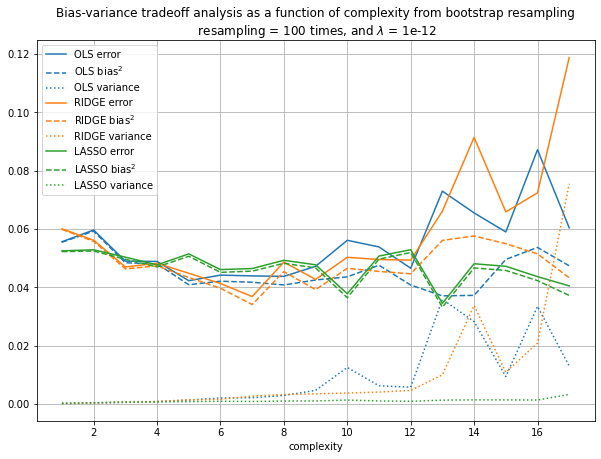

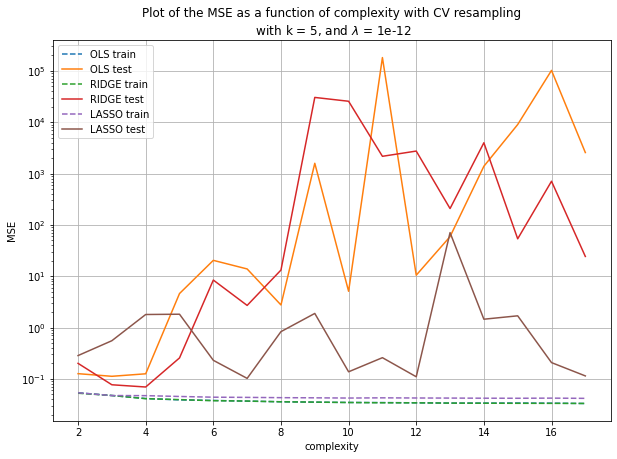

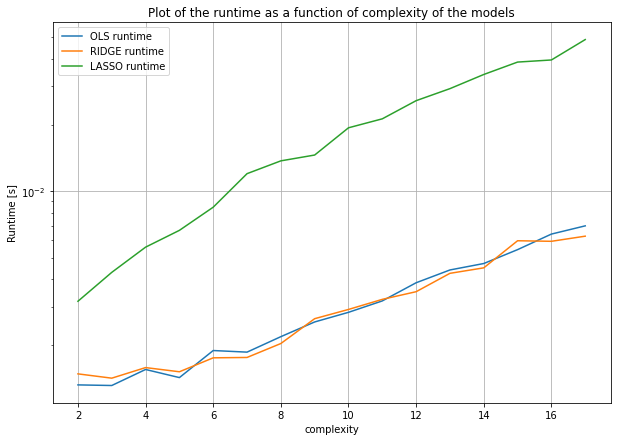

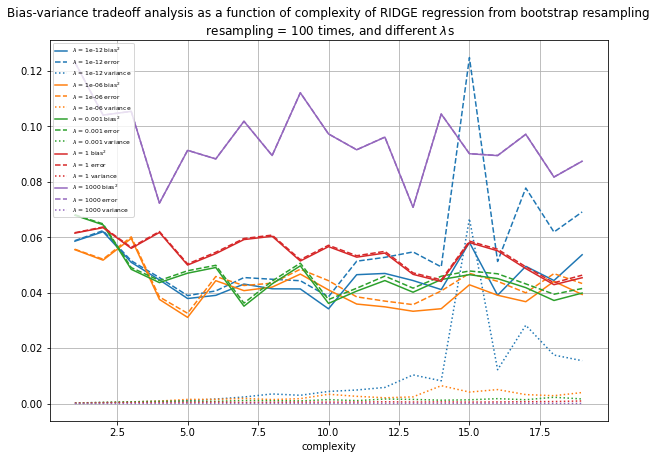

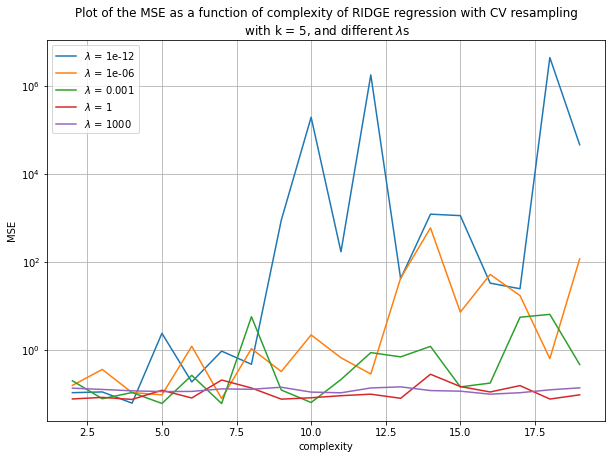

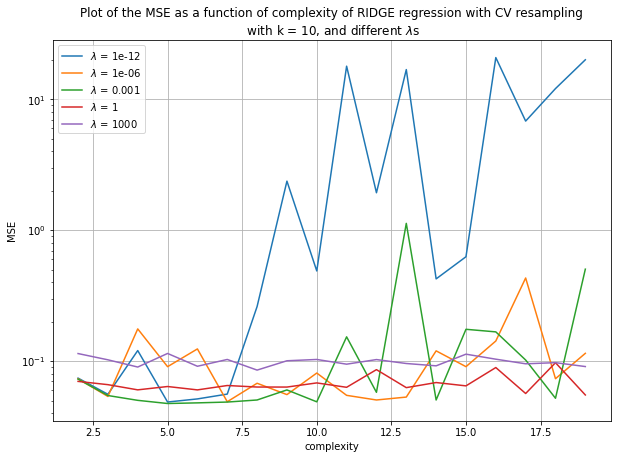

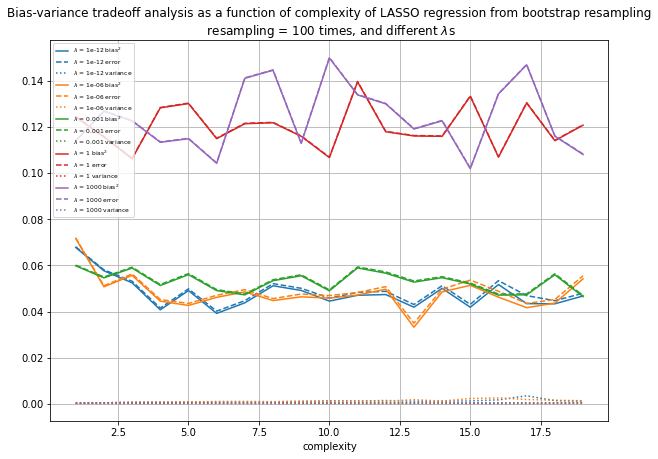

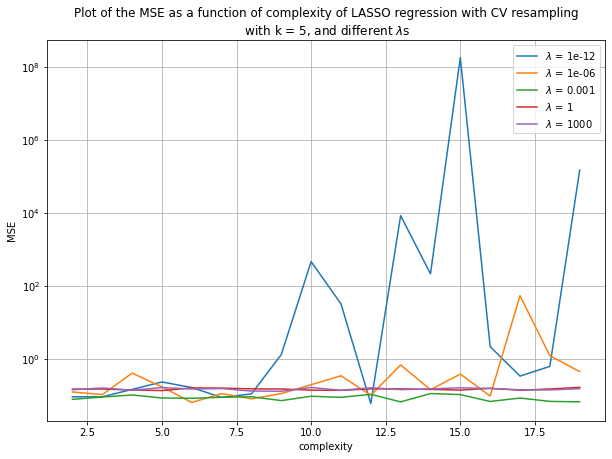

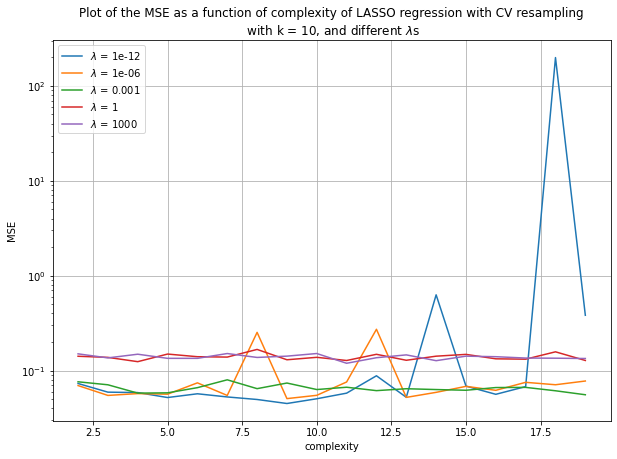

In [3]:
import warnings
warnings.filterwarnings('ignore')
%run ../1project/task45a.py

### Comments
<font color=purple>**comment results**
Study the dependence on $\lambda$</font>

<font color="purple">
We see that Ridge regression is nothing but the standard OLS with a
modified diagonal term added to $\boldsymbol{X}^T\boldsymbol{X}$. The consequences, in
particular for our discussion of the bias-variance tradeoff are rather
interesting. We will see that for specific values of $\lambda$, we may
even reduce the variance of the optimal parameters $\boldsymbol{\beta}$. These topics and other related ones, will be discussed after the more linear algebra oriented analysis here. </font>

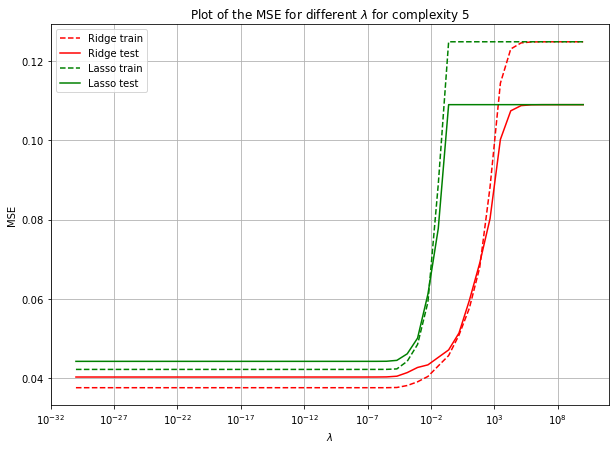

In [2]:
import warnings
warnings.filterwarnings('ignore')
%run ../1project/task45b.py

### Comments
<font color=purple>**comment results**

Give  acritical discussion of the three methods and a judgement of which model fits the data best.  Perform here as well an analysis of the bias-variance trade-off using the **bootstrap** resampling technique and an analysis of the mean squared error using cross-validation. 
</font>

## Exercise 6: Analysis of real data
### Introduction

**With our codes functioning and having been tested properly on a
simpler function we are now ready to look at real data. We will
essentially repeat in this exercise what was done in exercises 1-5. However, we
need first to download the data and prepare properly the inputs to our
codes.  We are going to download digital terrain data from the website
<https://earthexplorer.usgs.gov/>,**

**Or, if you prefer, we have placed selected datafiles at <https://github.com/CompPhysics/MachineLearning/tree/master/doc/Projects/2021/Project1/DataFiles>

**In order to obtain data for a specific region, you need to register as
a user (free) at this website and then decide upon which area you want
to fetch the digital terrain data from.  In order to be able to read
the data properly, you need to specify that the format should be **SRTM
Arc-Second Global** and download the data as a **GeoTIF** file.  The
files are then stored in *tif* format which can be imported into a
Python program using

### Algorithm
- `FrankeFunction(x,y)`:


### Results
Since it may take some time to run, we upload directly the results.

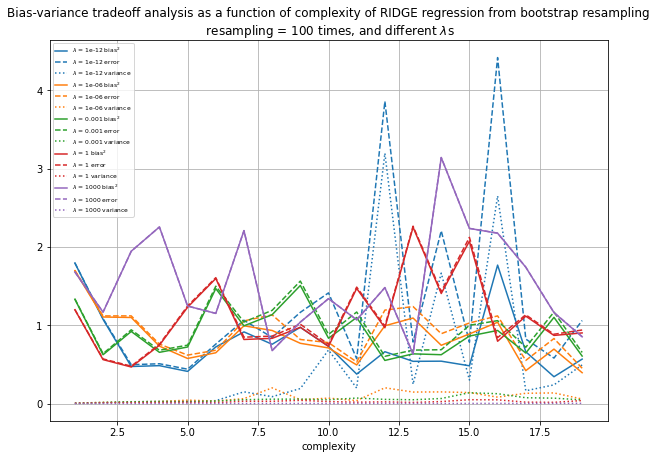

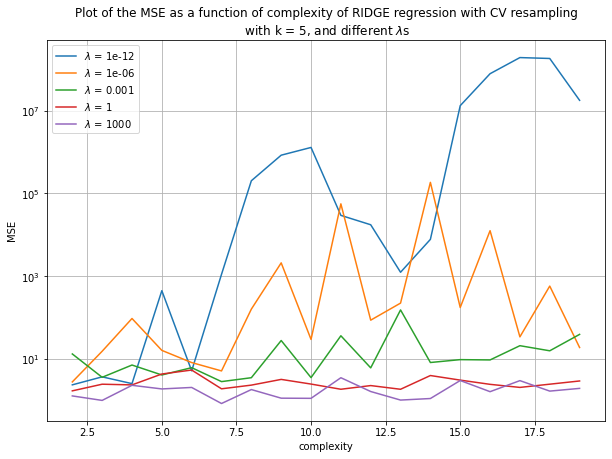

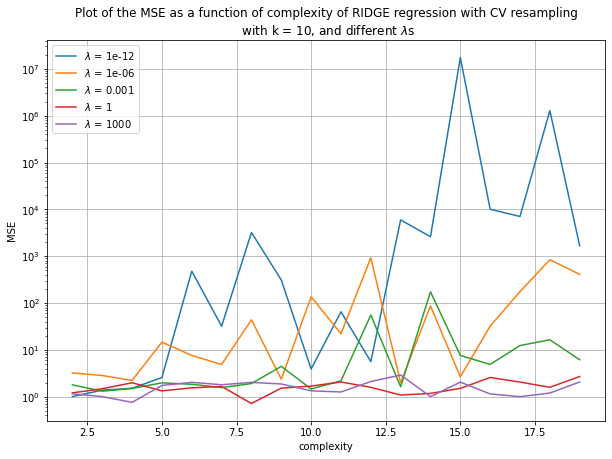

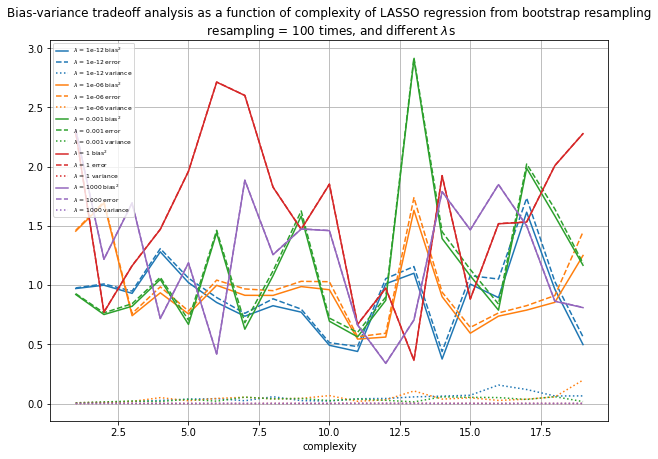

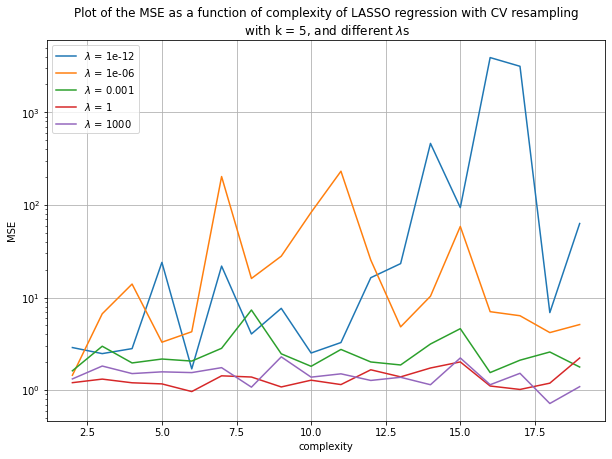

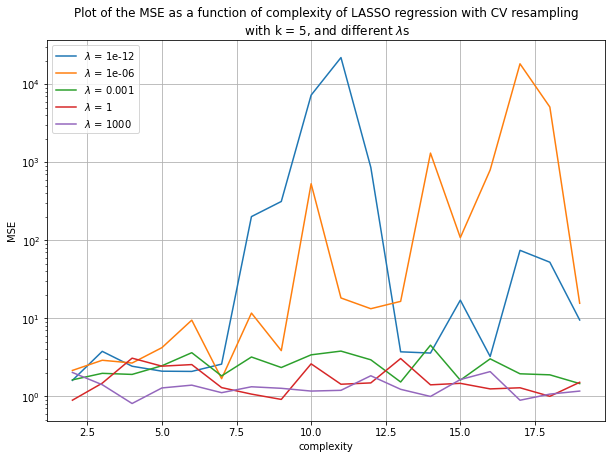

FileNotFoundError: [Errno 2] No such file or directory: '../reports/Proj1_Plots/Task 6/Terran.png'

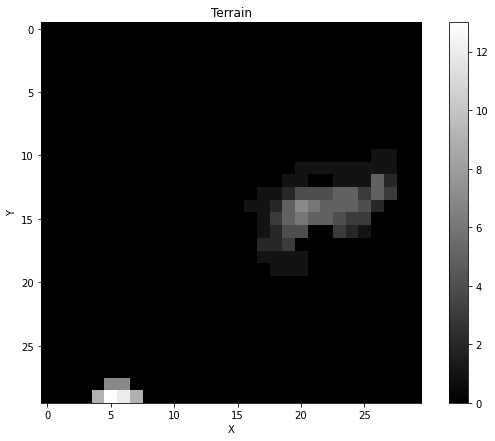

In [3]:
%run ../1project/task6.py

### Comments
<font color=purple>**At the end, you should present a critical evaluation of your results
and discuss the applicability of these regression methods to the type
of data presented here (either the terrain data we propose or other data sets).**</font>

# Fred's version:

In [ ]:
import numpy as np
from random import random, seed
from regression import FrankeFunction, create_X, Split_and_Scale, OLS_solver, MSE, R2, Plot_FrankeFunction

# Create vanilla dataset:
np.random.seed(1233)

n = 25

x = np.linspace(0,1,n)
y = np.linspace(0,1,n) 
x, y = np.meshgrid(x,y)

sigma_N = 0.1; mu_N = 0 
z = FrankeFunction(x,y) +mu_N+sigma_N*np.random.randn(n,n)

Plot_FrankeFunction(x,y,z, title="Original noisy dataset")


Above, we see a plot of the frankefunction with some added noise. Having $\sigma = 0.1$ seems to be a reasonable amount of noise, by looking at the plot. 

We can know create the designmatrix, for a polynomial up to the 5th order. We also want to split and scale the dataset, so we can make our model and prediction.

We do not **have** to scale this dataset as we're not working with a lot of different units. If we imagine this to be terrain data, all the data in the set could be mesured in meteres. However, we use boolean as an argument to quickly be able to enable or disable scaling. We decided to scale the data for more adaptive code that can be reused for other purposes(Adele agree?).

To create the designmatrix, as well as to split and scale out data, we run the following lines:

In [ ]:
degree=5

X = create_X(x, y, degree)
X_train, X_test, z_train, z_test = Split_and_Scale(X,np.ravel(z)) #StardardScaler, test_size=0.2, scale=true

As we now have our training and test data seperated we can go on to find the optimal $\hat{\beta}$ values for the training set, as well as our model and prediction. We do this using **OLS_solver()** which calculates $\hat{\beta}$ through matrix inversion:

$$\hat{\beta}^{OLS} = (X^T X)^{-1}X^T z$$

Where X is the designmatrix for the traindata and z is the training datapoints from the frankefunction. To avoid problems arising from singular matrices, we use the **pinv()** function to find the psudoinverse.

This yields both our model and the prediction by
$$\tilde{z} = X \hat{\beta}$$
Where X is the designmatrix for the training data to produce our model, and the designmatrix for our test data to produce out prediction. 

We run the following line to find our result:

In [ ]:
ols_beta, z_tilde,z_predict = OLS_solver(X_train, X_test, z_train, z_test)

As we now have our model and prediction we can go on to calculate the mean square error and the R2 score for both our model and presdiction:

Finally, we know that the confidence interval of beta can be found by:
$$var(\beta) = \sigma^2 (X^T X)^{-1}$$
Where $\sigma$ si our deviation from the dataset, and X is the designmatrix for the training data.

We can therefore calculate the confidence interval in the following way:


In [ ]:
import pandas as pd
# Confidence interval
beta_ols_variance = sigma_N**2 * np.linalg.pinv(X_train.T @ X_train) #Calculates variance of beta
var_diag=np.diag(beta_ols_variance)
ci1 = ols_beta - 1.96 * np.sqrt(var_diag)/(X.shape[0])
ci2 = ols_beta + 1.96 * np.sqrt(var_diag)/(X.shape[0])
print('Confidence interval of β-estimator at 95 %:')
ci_df = {r'$β_{-}$': ci1,
         r'$β_{ols}$': ols_beta,
         r'$β_{+}$': ci2}
ci_df = pd.DataFrame(ci_df)
display(np.round(ci_df,3))#prec
print("––––––––––––––––––––––––––––––––––––––––––––")


Above we can see the confidence interval for our estimators with a 95% certainty. 

Firstly, the $MSE$ is explored as function of complexity, in particular when dividing the dataset into training and test data, in order to find the optimal "complexity" (i.e. degree of polynomial) without exceding in overfitting. To get a better extimation of the $MSE$ it has been coupled with resampling methods, and to have a better understanding and deeper comprehension, a bias-variance tradeoff analysis has been performed.

We can reproduce figure. 2.11 from Hastie, Tibshiani and Friedman, by plotting the MSE as a function of the complexity of the model. By using the same x, y and z values, we calculate the designmatrix **X** with a complexity from n=2 to n=20, where n is the compexity/degree og the polynomial. For each designmtrix we find the OLS and calcualte the MSE for the test and training data. We import the function **plot_ols_complexity**(x, y, z, complexity) from the linear_regression library, which does exactly this. It's default valye for complexity is set to **range(2,20)**. After importing **plot_ols_complexity()** we can therefore simply write:

In [ ]:
from linear_regression import plot_ols_complexity
complexity = range(2,20)
plot_ols_complexity(x,y,z,complexity)